In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize

In [77]:
plt.rcParams['figure.figsize'] = [7, 7]

In [78]:
import json
with open("./data_collection.json") as f:
    data = json.loads(f.read())
print("Robot: ", data["duck"])
map_data = data["map_data"]
data = data["data"]

Robot:  DUCKVADER


In [79]:
df = pd.DataFrame(data)
df = df.set_index("sample")
df

,Positions,Inputs,Notes
sample,,,
Left circle,"[[0.5828549931435344, 2.260032743558054, -1.50...","[[0.12, 0.4], [0.12, 0.4], [0.12, 0.4], [0.12,...",Angular speed is wrong
Straight,"[[0.31610534813331903, 2.9663534569084686, -0....","[[0.4, 0.4], [0.4, 0.4], [0.4, 0.4], [0.4, 0.4...",None
Back,"[[1.527203050216432, 1.130807079190915, -1.111...","[[-0.5, -0.5], [-0.5, -0.5], [-0.5, -0.5], [-0...",None
Right circle,"[[1.1846456511238752, 2.7809238853907283, -0.9...","[[0.5, 0.15], [0.5, 0.15], [0.5, 0.15], [0.5, ...",None
Straight line calibrated,"[[0.29815961535562246, 2.979839822281533, -1.5...","[[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5...",None
Left circle calibrated,"[[1.064313836164062, 1.6532245944953257, 0.038...","[[0.15, 0.5], [0.15, 0.5], [0.15, 0.5], [0.15,...",None
Right circle calibrated,"[[1.094857572670193, 2.517572183283877, 0.2655...","[[0.5, 0.15], [0.5, 0.15], [0.5, 0.15], [0.5, ...",None
Backward calibrated,"[[0.6732136774254198, 0.857132173006317, -1.49...","[[-0.5, -0.5], [-0.5, -0.5], [-0.5, -0.5], [-0...",None
Left circle max speed,"[[-0.01380166650430956, -0.021668978088875968,...","[[0.6, 1.0], [0.6, 1.0], [0.6, 1.0], [0.6, 1.0...",


Text(1, 2, 'Mean error: 5.07cm')

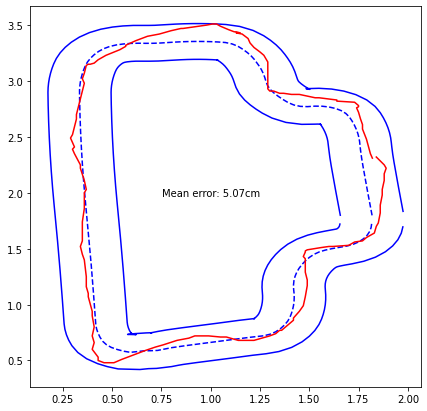

In [90]:
import utils
traj = np.array(map_data).reshape(-1,2)
inside, outside = utils.get_border(traj, distance=0.16)

# Find the points that are closest to the map
import scipy.spatial
map_points = np.array(map_data).reshape(-1,2)
tree = scipy.spatial.cKDTree(map_points)
distances, indices = tree.query(np.array(df.iloc[-2]["Positions"])[300:560,:2])
error = distances.mean()

plt.plot(*inside.T, "b")
plt.plot(*outside.T, "b")
plt.plot(*traj.T, "b--")
plt.plot(*np.array(df.iloc[-2]["Positions"])[300:560,:2].T, "r")
plt.text(1, 2,f"Mean error: {round(error,4)*100}cm", ha='center', va='center')

Text(1, 2, 'Mean error: 4.51cm')

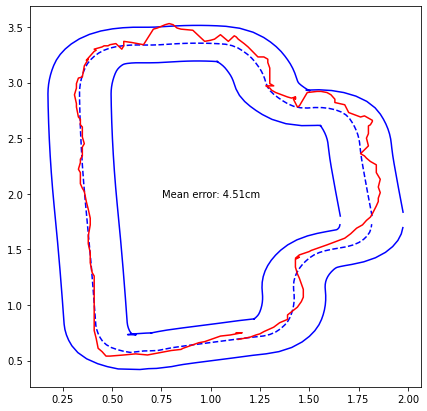

In [91]:
# Find the points that are closest to the map
distances, indices = tree.query(np.array(df.iloc[-1]["Positions"])[100:430,:2])

error = distances.mean()

plt.plot(*inside.T, "b")
plt.plot(*outside.T, "b")
plt.plot(*traj.T, "b--")
plt.plot(*np.array(df.iloc[-1]["Positions"])[100:430,:2].T, "r")
plt.text(1, 2,f"Mean error: {round(error,4)*100}cm", ha='center', va='center')

Text(0.5, 1.0, 'Speed profile')

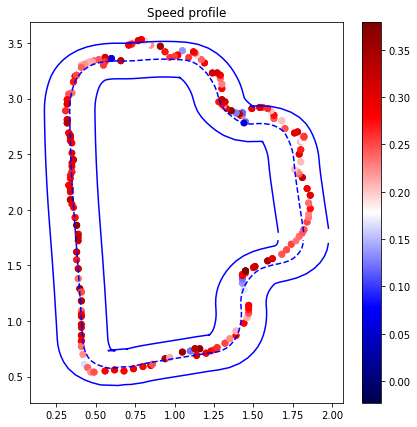

In [99]:
X_log = np.array(df.iloc[-1]["Positions"])[100:430,:]

plt.plot(traj[:,0], traj[:,1], "b--")
plt.plot(*inside.T, "b")
plt.plot(*outside.T, "b")
cm = plt.cm.get_cmap('seismic')
sc = plt.scatter(X_log.T[0,:], X_log.T[1,:], c=X_log.T[3,:], cmap=cm, label="Last iteration")
plt.colorbar(sc)
plt.title("Speed profile")